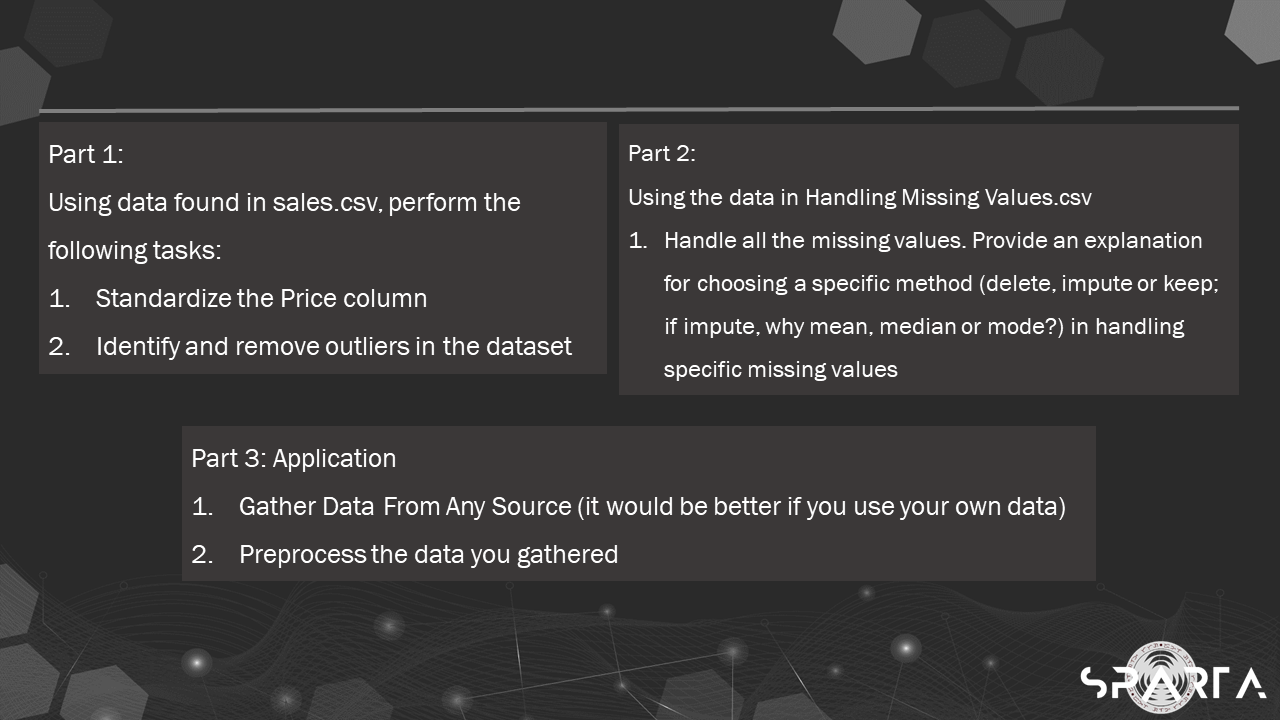

In [1]:
# PYTHON LIBRARIES
import pandas as pd
import numpy as np

# PART 1

Using data found in sales.csv

In [2]:
sales_data = pd.read_csv("https://coursebank.ph/assets/courseware/v1/d5196085dd4bb26377be4bd84ccfe39d/asset-v1:DAP+SP702+2020_Q2+type@asset+block/sales.csv")
sales_data

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude
0,1/2/2009 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/2009 6:00,1/2/2009 6:08,51.500000,-1.116667
1,1/2/2009 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/2009 4:42,1/2/2009 7:49,39.195000,-94.681940
2,1/2/2009 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/2009 16:21,1/3/2009 12:32,46.188060,-123.830000
3,1/3/2009 14:44,Product1,1200,Visa,Gouya,Echuca,Victoria,Australia,9/25/2005 21:13,1/3/2009 14:22,-36.133333,144.750000
4,1/4/2009 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/2008 15:47,1/4/2009 12:45,33.520560,-86.802500
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1/22/2009 14:25,Product1,1200,Visa,Hans-Joerg,Belfast,Northern Ireland,United Kingdom,11/10/2008 12:15,3/1/2009 3:37,54.583333,-5.933333
996,1/28/2009 5:36,Product2,3600,Visa,Christiane,Black River,Black River,Mauritius,1/9/2009 8:10,3/1/2009 4:40,-20.360278,57.366111
997,1/1/2009 4:24,Product3,7500,Amex,Pamela,Skaneateles,NY,United States,12/28/2008 17:28,3/1/2009 7:21,42.946940,-76.429440
998,1/8/2009 11:55,Product1,1200,Diners,julie,Haverhill,England,United Kingdom,11/29/2006 13:31,3/1/2009 7:28,52.083333,0.433333


<b> 1. Standardize the Price Column. </b> <br>
    Xnew = (Xold - Mean) / Standard Deviation

In [3]:
sales_data.insert(12, 'standardized_price', 0)

In [4]:
#pd.set_option('mode.chained_assignment', None)
#sales_data["Price"].dropna(axis=0,how='any')
sales_data["Price"] = sales_data["Price"].str.replace(',','')
sales_data["Price"] = sales_data["Price"].astype(str).astype(float)

In [5]:
sales_data.standardized_price = (sales_data.Price - np.mean(sales_data.Price)) / (np.std(sales_data.Price))

<b> 2. Identify and remove outliers in the dataset </b>

In [6]:
sales_data.describe()

,Price,Latitude,Longitude,standardized_price
count,999.000000,997.000000,999.000000,9.990000e+02
mean,1650.970971,38.984398,-41.417494,-3.737417e-16
std,1210.577115,19.499041,67.377526,1.000501e+00
min,20.000000,-41.465000,-159.485280,-1.347942e+00
25%,1200.000000,35.782500,-88.207775,-3.727122e-01
50%,1200.000000,42.309720,-73.733890,-3.727122e-01
75%,1200.000000,51.050000,4.850000,-3.727122e-01
max,13000.000000,64.837780,174.766667,9.379587e+00


In [7]:
m = np.mean(sales_data.Price)
s = np.std(sales_data.Price)
ll = max(0,m - 3*s)
ul = m + 3*s

sales_data_cleaned1 = sales_data[sales_data.Price >= ll]
sales_data_cleaned2 = sales_data[sales_data.Price <= ll]
sales_data_cleaned1

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude,standardized_price
0,1/2/2009 6:17,Product1,1200.0,Mastercard,carolina,Basildon,England,United Kingdom,1/2/2009 6:00,1/2/2009 6:08,51.500000,-1.116667,-0.372712
1,1/2/2009 4:53,Product1,1200.0,Visa,Betina,Parkville,MO,United States,1/2/2009 4:42,1/2/2009 7:49,39.195000,-94.681940,-0.372712
2,1/2/2009 13:08,Product1,1200.0,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/2009 16:21,1/3/2009 12:32,46.188060,-123.830000,-0.372712
3,1/3/2009 14:44,Product1,1200.0,Visa,Gouya,Echuca,Victoria,Australia,9/25/2005 21:13,1/3/2009 14:22,-36.133333,144.750000,-0.372712
4,1/4/2009 12:56,Product2,3600.0,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/2008 15:47,1/4/2009 12:45,33.520560,-86.802500,1.610806
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1/22/2009 14:25,Product1,1200.0,Visa,Hans-Joerg,Belfast,Northern Ireland,United Kingdom,11/10/2008 12:15,3/1/2009 3:37,54.583333,-5.933333,-0.372712
996,1/28/2009 5:36,Product2,3600.0,Visa,Christiane,Black River,Black River,Mauritius,1/9/2009 8:10,3/1/2009 4:40,-20.360278,57.366111,1.610806
997,1/1/2009 4:24,Product3,7500.0,Amex,Pamela,Skaneateles,NY,United States,12/28/2008 17:28,3/1/2009 7:21,42.946940,-76.429440,4.834024
998,1/8/2009 11:55,Product1,1200.0,Diners,julie,Haverhill,England,United Kingdom,11/29/2006 13:31,3/1/2009 7:28,52.083333,0.433333,-0.372712


In [8]:
sales_data_cleaned1.describe()

,Price,Latitude,Longitude,standardized_price
count,999.000000,996.000000,998.000000,9.990000e+02
mean,1650.970971,38.989586,-41.340722,-3.737417e-16
std,1210.577115,19.508149,67.367577,1.000501e+00
min,20.000000,-41.465000,-159.485280,-1.347942e+00
25%,1200.000000,35.885833,-88.080623,-3.727122e-01
50%,1200.000000,42.320695,-73.730695,-3.727122e-01
75%,1200.000000,51.050000,4.883333,-3.727122e-01
max,13000.000000,64.837780,174.766667,9.379587e+00


## PART 2

Using the data in Handling Missing Values.csv

1. Handle all the missing values. Provide an explanation for choosing a specic method (delete, impute or keep; if impute, why mean, median, or mode?) in handling specific missing values.

In [9]:
missing_values = pd.read_csv("https://coursebank.ph/assets/courseware/v1/39bd7fa2d5e00e98876d7491cbe61104/asset-v1:DAP+SP702+2020_Q2+type@asset+block/Handling_Missing_Values.csv")
missing_values

,ID,Sex,Age,Income,Employed,Children,Buy_Car
0,1,Male,25,25146.0,Single,0.0,No
1,2,Male,30,26939.0,Married,2.0,Yes
2,3,Male,27,26693.0,Married,0.0,No
3,4,Male,28,26666.0,Married,3.0,Yes
4,5,Male,29,25899.0,Married,0.0,No
5,6,Male,28,26462.0,Married,1.0,No
6,7,Female,28,NaN,Married,3.0,Yes
7,8,NaN,30,26037.0,Married,2.0,Yes
8,9,Female,28,26167.0,Married,1.0,Yes
9,10,NaN,28,NaN,Single,NaN,No


In [10]:
missing_values.isnull().sum()

ID          0
Sex         4
Age         0
Income      3
Employed    0
Children    2
Buy_Car     0
dtype: int64

In [11]:
# Sex - Categorical Data
# Income - Numerical Data
# Children - Categorical Data

In [12]:
missing_values.isnull().sum()

ID          0
Sex         4
Age         0
Income      3
Employed    0
Children    2
Buy_Car     0
dtype: int64

In [13]:
#Percentage of each value in Sex Column
missing_values['Sex'].value_counts(True)*100

Male      62.5
Female    37.5
Name: Sex, dtype: float64

In [14]:
# sex_pct variable for sex percentage
sex_pct = missing_values['Sex'].value_counts(True)*100

# Total missing value for sex * Total percentage of male in Sex
# 4 x (62.5 x .01) = 2.5 

male = (sex_pct[0])*(missing_values.isnull().sum()[1]*.01)


In [15]:
#Since the missing value is categorical data I decided to Data imputate using mode.

mode_value = missing_values['Sex'].mode()
#mode_value
# round(2.5) = Males to fill in the missing values.
missing_values['Sex'] = missing_values['Sex'].fillna(mode_value[0], limit = round(male))
# The rest are females.
missing_values['Sex'] = missing_values['Sex'].fillna(value='Female')
#missing_values.isnull().sum()

#With this way the percentage for each male and female don't have large difference after the manipulation by Data imputation
missing_values['Sex'].value_counts(True)*100

Male      60.0
Female    40.0
Name: Sex, dtype: float64

Missing Values of INCOME

In [16]:
""" The mean of income is 26245 and the range of the data is 1,875 which means the data for all income does
not have long gap to each other. So I decided to use mean to data imputate. """

mean_value = missing_values['Income'].mean()
missing_values['Income'] = missing_values['Income'].fillna(mean_value)

Missing Values of CHILDREN

In [17]:
# same goes for the missing values of Children
mode_value = missing_values['Children'].mode()
missing_values['Children'] = missing_values['Children'].fillna(mode_value[0])

# Part3: Application
### 1. Gather Data From Any Source

<h2> Note: </h2> The data I'm utilizing comes from an exercise in one of my current classes; please consider my answer, for it is as well as my preparation for my upcoming class assessment, which is also about <b> data preprocessing</b>. Thanks! Hoping for your kind consideration.

In [18]:
from scipy import stats
bank_train = pd.read_csv("bank_marketing_training.csv")
bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no
26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes
26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963,no
26872,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes


### 2. Preprocess the data you gathered

In [19]:
#Derive an index field and add it to the data set.
n = bank_train.shape[0]
bank_train['index'] = pd.Series(range(0,n))

dup = bank_train['index']
bank_train = bank_train.drop(labels='index',axis=1)
bank_train.insert(0,'index',dup)
bank_train

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,3,25,services,single,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,4,29,blue-collar,single,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,26869,36,admin.,married,university.degree,no,no,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no
26870,26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes
26871,26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963,no
26872,26872,73,retired,married,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes


In [20]:
#For the education field, reexpress the field values as the numeric values
bank_train['education_numeric'] = bank_train['education']

dict_edu = {"education_numeric":
          {
              "illiterate": 0,
              "basic.4y": 4,
              "basic.6y": 6,
              "basic.9y": 9,
              "high.school": 12,
              "professional.course": 12,
              "university.degree": 16,
              "unknown": np.NaN
          }
}

bank_train.replace(dict_edu, inplace = True)
bank_train

,index,age,job,marital,education,default,housing,loan,contact,month,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,education_numeric
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4.0
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0
2,2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,NaN
3,3,25,services,single,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0
4,4,29,blue-collar,single,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,26869,36,admin.,married,university.degree,no,no,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,16.0
26870,26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,16.0
26871,26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,...,9,1,success,-1.1,94.767,-50.8,1.028,4963,no,4.0
26872,26872,73,retired,married,professional.course,no,yes,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,12.0


In [21]:
#standardize the field age.
bank_train['age_z'] = stats.zscore(bank_train['age'])
bank_train

,index,age,job,marital,education,default,housing,loan,contact,month,...,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,education_numeric,age_z
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4.0,1.539625
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,1.635778
2,2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,NaN,0.097330
3,3,25,services,single,high.school,no,yes,no,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,-1.441118
4,4,29,blue-collar,single,high.school,no,no,yes,telephone,may,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,-1.056506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,26869,36,admin.,married,university.degree,no,no,no,cellular,nov,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,16.0,-0.383435
26870,26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,16.0,-0.287282
26871,26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,...,1,success,-1.1,94.767,-50.8,1.028,4963,no,4.0,-1.056506
26872,26872,73,retired,married,professional.course,no,yes,no,cellular,nov,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,12.0,3.174226


In [22]:
# All records that are outliers according to the field age_z.

# All outliers ( + and - z-score of 3)
bank_train_outliers_age = bank_train.query('age_z > 3 | age_z < -3')
# bank_train_outliers_age

# REMOVE # Z-Score of > 3
bank_train = bank_train.drop(index=bank_train[bank_train['age_z'] > 3].index)

# REMOVE # Z-Score of < -3
bank_train = bank_train.drop(index=bank_train[bank_train['age_z'] < -3].index)

In [23]:
bank_train_outliers_age_query = bank_train.query('age_z > 3 | age_z < -3')

print('There are', bank_train_outliers_age_query.shape[0],'outliers in the age variable.')

There are 0 outliers in the age variable.


In [24]:
# For the job field, combine the jobs with less than 5% of the records into a field called other.

jobcounts = pd.Series(bank_train['job']).value_counts()/bank_train.shape[0]
bank_train['jb'] = bank_train['job'] 
dict_job = {"jb":
                {"retired":"other",
                 "self-employed":"other",
                 "entrepreneur":"other",
                 "housemaid":"other",
                 "unemployed":"other",
                 "student":"other",
                 "blue-collar":"blue",
                  "unknown":"other",
                }
}
bank_train.replace(dict_job, inplace=True)
bank_train

,index,age,job,marital,education,default,housing,loan,contact,month,...,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,education_numeric,age_z,jb
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4.0,1.539625,other
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,1.635778,services
2,2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,NaN,0.097330,blue
3,3,25,services,single,high.school,no,yes,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,-1.441118,services
4,4,29,blue-collar,single,high.school,no,no,yes,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,-1.056506,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26868,26868,57,retired,married,professional.course,no,yes,no,cellular,nov,...,nonexistent,-1.1,94.767,-50.8,1.031,4963,no,12.0,1.635778,other
26869,26869,36,admin.,married,university.degree,no,no,no,cellular,nov,...,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,16.0,-0.383435,admin.
26870,26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,...,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,16.0,-0.287282,admin.
26871,26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,...,success,-1.1,94.767,-50.8,1.028,4963,no,4.0,-1.056506,other


In [25]:
# Rename the default predictor to credit_default.

bank_train = bank_train.rename(columns={'default':'credit_default'})
bank_train

,index,age,job,marital,education,credit_default,housing,loan,contact,month,...,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,education_numeric,age_z,jb
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4.0,1.539625,other
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,1.635778,services
2,2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,NaN,0.097330,blue
3,3,25,services,single,high.school,no,yes,no,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,-1.441118,services
4,4,29,blue-collar,single,high.school,no,no,yes,telephone,may,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,-1.056506,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26868,26868,57,retired,married,professional.course,no,yes,no,cellular,nov,...,nonexistent,-1.1,94.767,-50.8,1.031,4963,no,12.0,1.635778,other
26869,26869,36,admin.,married,university.degree,no,no,no,cellular,nov,...,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,16.0,-0.383435,admin.
26870,26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,...,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,16.0,-0.287282,admin.
26871,26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,...,success,-1.1,94.767,-50.8,1.028,4963,no,4.0,-1.056506,other


In [26]:
#For the variable month, change the field values to 1–12, but keep the variable as categorical.
dict_month = {"month":
                {"jan":"1",
                 "feb":"2",
                 "mar":"3",
                 "apr":"4",
                 "may":"5",
                 "jun":"6",
                 "jul":"7",
                  "aug":"8",
                 "sep":"9",
                 "oct":"10",
                 "nov":"11",
                 "dec":"12"
                }
}
bank_train.replace(dict_month, inplace=True)
bank_train

,index,age,job,marital,education,credit_default,housing,loan,contact,month,...,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,education_numeric,age_z,jb
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,5,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4.0,1.539625,other
1,1,57,services,married,high.school,unknown,no,no,telephone,5,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,1.635778,services
2,2,41,blue-collar,married,unknown,unknown,no,no,telephone,5,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,NaN,0.097330,blue
3,3,25,services,single,high.school,no,yes,no,telephone,5,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,-1.441118,services
4,4,29,blue-collar,single,high.school,no,no,yes,telephone,5,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,-1.056506,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26868,26868,57,retired,married,professional.course,no,yes,no,cellular,11,...,nonexistent,-1.1,94.767,-50.8,1.031,4963,no,12.0,1.635778,other
26869,26869,36,admin.,married,university.degree,no,no,no,cellular,11,...,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,16.0,-0.383435,admin.
26870,26870,37,admin.,married,university.degree,no,yes,no,cellular,11,...,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,16.0,-0.287282,admin.
26871,26871,29,unemployed,single,basic.4y,no,yes,no,cellular,11,...,success,-1.1,94.767,-50.8,1.028,4963,no,4.0,-1.056506,other
